<a href="https://colab.research.google.com/github/Anacrishc/Twitter/blob/main/twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Caso 3: Sentimientos en Twitter* - Análisis sentimental, sintáctico y gramatical de comentarios Twitter

Alumno: Anacristina Huamani Centeno

Twitter ha experimentado un deterioro en su comunidad, con la presencia de trolls (personas que buscan molestar o enojar a otros con bromas pesadas o comentarios inapropiados) y cuñados (personas que comentan sobre cualquier tema tratando de aparentar ser más inteligentes que los demás). Estos elementos negativos han transformado la plataforma en un lugar donde conversaciones de calidad se ven afectadas y se asemejan a un ambiente de patio de escuela. Sin embargo, se propone utilizar técnicas de análisis de texto para combatir a los trolls y cuñados, y así devolver a Twitter a su estado anterior de esplendor. Estas técnicas implican extraer información a partir del lenguaje humano para comprender cómo las personas entienden el mundo, agruparlas y identificar patrones de comportamiento.

1.   Puntuación sentimental o polaridad (-5 = negativa … 0 = neutral … 5 = positiva) (por calcular)
2.   Id del tweet
3.   Fecha del tweet (Sat May 16 23:58:44 UTC 2009)
4.   Búsqueda. Si no hay búsqueda, el valor es NO_QUERY
5.   Usuario que ha tweeteado
6.   Texto del tweet


In [ ]:
!pip install nltk textstat transformers xformers

In [ ]:
!pip install wordcloud

In [ ]:
!pip install transformers


In [ ]:
!pip install --upgrade scikit-learn


In [ ]:
!pip install nltk
!pip install scikit-learn
!pip install gensim
!pip install spacy


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import movie_reviews
from nltk.classify import NaiveBayesClassifier
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import gensim
import spacy
import textstat
from dateutil import parser
import re
import transformers
import xformers



1.   Eliminar caracteres de puntuación, espacios adicionales, dígitos u otros caracteres que puedan entorpecer el análisis textual

1.  sentimental_rate: Puntuación sentimental o polaridad (-5 = negativa … 0 = neutral … 5 = positiva) (por calcular)
2.   tweet_id: Id del tweet
3.   date: Fecha del tweet (Sat May 16 23:58:44 UTC 2009)
4.   search: Búsqueda. Si no hay búsqueda, el valor es NO_QUERY
5.   user_name:Usuario que ha tweeteado
6.   text:Texto del tweet

In [ ]:
#Cargamos la dataset
df_twitter= pd.read_csv('../twitter/training.1600000.processed.noemoticon.csv',header=None,names=['sentimental_rate','tweet_id','date','search','user_name','text'])
df_twitter.drop('sentimental_rate', axis=1, inplace=True)
display(df_twitter)

,tweet_id,date,search,user_name,text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...
1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
#Eliminamos caracteres de puntuación, espacios adicionales, dígitos u otros
df_twitter['clean_text'] = df_twitter['text'].str.replace(r'[@#/.\-,:]', '', regex=True)
df_twitter['clean_text'] = df_twitter['clean_text'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
df_twitter['clean_text'] = df_twitter['clean_text'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
df_twitter['clean_text'] = df_twitter['clean_text'].apply(lambda x: ' '.join(x.split()))
# Mostrar el DataFrame resultante
display(df_twitter)


,tweet_id,date,search,user_name,text,clean_text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccomyzl Awww thats a bumm...
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Manag...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...
...,...,...,...,...,...,...
1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Just woke up Having no school is the best feel...
1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,TheWDBcom Very cool to hear old Walt interview...
1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover Ask me fo...
1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Happy th Birthday to my boo of alll time Tupac...


2.   Tokenizar y eliminar Stopwords. Se requiere un diccionario de palabras para quitar aquellas que puedan entorpecer el análisis textual. Por ejemplo, se puede utilizar “from nltk.corpus import stopwords”. Ejemplo: NLTK stop words - Python Tutorial (pythonspot.com)

In [ ]:
#Descargamos las stopwords y el modelo para el analizador de sentimientos :
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#Cargamos las stopwords (palabras comunes que se consideran irrelevantes para el análisis de texto debido a que no aportan mucho significado en sí mismas) y crear una instancia del analizador de sentimientos:
stop_words = set(stopwords.words('english'))
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANACRISTINA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ANACRISTINA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANACRISTINA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ANACRISTINA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ANACRISTINA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Utilizamos una expresión regular para encontrar coincidencias con las contracciones en el texto y lO reemplazamos por sus formas expandidas correspondientes.
#Definimos un diccionario contractions_dict que mapea las contracciones comunes a sus formas expandidas
contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "cant": "can not",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "dont": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'll": "I will",
    "Im": "I am",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "might've": "might have",
    "must've": "must have",
    "needn't": "need not",
    "o'clock": "of the clock",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that'd": "that would",
    "that's": "that is",
    "there'd": "there would",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'd": "what did",
    "what's": "what is",
    "when'd": "when did",
    "when'll": "when will",
    "when's": "when is",
    "where'd": "where did",
    "where'll": "where will",
    "where's": "where is",
    "who'd": "who would",
    "who'll": "who will",
    "who's": "who is",
    "why'd": "why did",
    "why'll": "why will",
    "why's": "why is",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"

}
#Creamos una expresión regular contractions_re que busca coincidencias con las contracciones en el texto
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
#La función expand_contractions utiliza esta expresión regular para reemplazar las contracciones por sus formas expandidas.
def expand_contractions(text):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
#Expandimos las contracciones en todo el texto para asegurar que las stopwords puedan ser correctamente identificadas por la librería NLTK.
df_twitter['clean_text'] = df_twitter['clean_text'].apply(expand_contractions)


In [ ]:
#tokenizamos y eliminamos las stopwords utilizando NLTK:
#se define un conjunto de stopwords en inglés utilizando stopwords.words('english').
stop_words = set(stopwords.words('english'))

def remove_stopwords(text): #toma un texto como entrada y lo tokeniza utilizando word_tokenize de NLTK
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words] #se filtran los tokens para eliminar aquellos que estén presentes en el conjunto de stopwords.
    return " ".join(filtered_tokens) #unimos los tokens filtrados en un solo texto.
#La función remove_stopwords se aplica a la columna 'clean_text' del DataFrame df_twitter utilizando el método apply. Esto eliminará las stopwords de cada texto en la columna.
df_twitter['clean_text'] = df_twitter['clean_text'].apply(remove_stopwords)


3.   Encontrar la raíz de las palabras aplicando lemmatization o stemming.

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(clean_text):
    tokens = nltk.word_tokenize(clean_text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmatized_tokens)

df_twitter['clean_text'] = df_twitter['clean_text'].apply(lemmatize_text)


In [ ]:
stemmer = PorterStemmer()

def stem_text(clean_text):
    tokens = nltk.word_tokenize(clean_text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(stemmed_tokens)

df_twitter['clean_text'] = df_twitter['clean_text'].apply(stem_text)


*ANÁLISIS:*

1.   ¿Cuál es la distribución de las polaridades y complejidad de lectura/escritura de los tweets en el dataset?


In [ ]:
# Creamos la instancia del SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Calculamos la puntuación sentimental para cada tweet de (-1, 1) a (-5, 5)
df_twitter['sentiment_score'] = df_twitter['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound']*5)

# Escalamos la puntuación sentimental
df_twitter['scaled_sentiment_score'] = df_twitter['sentiment_score']

# Calculamos la complejidad del texto para cada tweet
df_twitter['readability_score'] = df_twitter['clean_text'].apply(textstat.flesch_reading_ease)

# Creamos una escala de polaridad de sentimiento
df_twitter['sentiment_category'] = pd.cut(df_twitter['scaled_sentiment_score'], bins=[-5, -1, 0, 1, 5],
                                          labels=['Muy negativo', 'Negativo', 'Neutral', 'Positivo'])

# Distribución de polaridades
sentiment_distribution = df_twitter['sentiment_category'].value_counts().sort_index()
print(sentiment_distribution)

# Distribución de puntuaciones de legibilidad
readability_distribution = pd.cut(df_twitter['readability_score'], bins=[0, 30, 50, 100],
                                  labels=['Difícil', 'Moderado', 'Fácil']).value_counts()
print(readability_distribution)


sentiment_category
Muy negativo    277056
Negativo        626962
Neutral          62374
Positivo        633608
Name: count, dtype: int64
readability_score
Fácil       1095553
Moderado     163102
Difícil       38407
Name: count, dtype: int64


La respuesta muestra la distribución de las polaridades y la complejidad de lectura/escritura de los tweets en el dataset, después de escalar la puntuación sentimental de (-1, 1) a (-5, 5).

La columna "sentiment_category" representa las categorías de polaridad de sentimiento. Los valores son los siguientes:

"Muy negativo": 277056 tweets tienen una polaridad de sentimiento muy negativa.
"Negativo": 626962 tweets tienen una polaridad de sentimiento negativa.
"Neutral": 62374 tweets tienen una polaridad de sentimiento neutra.
"Positivo": 633608 tweets tienen una polaridad de sentimiento positiva.
Esto indica cómo se distribuyen los tweets en cada categoría de polaridad de sentimiento después de la escala.

La columna "readability_score" representa las categorías de puntuaciones de legibilidad. Los valores son los siguientes:

"Fácil": 1095553 tweets tienen una puntuación de legibilidad fácil.
"Moderado": 163102 tweets tienen una puntuación de legibilidad moderada.
"Difícil": 38407 tweets tienen una puntuación de legibilidad difícil.
Esto muestra cómo se distribuyen los tweets en cada categoría de puntuaciones de legibilidad después de calcular la complejidad del texto.

En resumen, la respuesta indica la cantidad de tweets en cada categoría de polaridad de sentimiento y la cantidad de tweets en cada categoría de puntuaciones de legibilidad después de escalar la puntuación sentimental y calcular la complejidad del texto.

a.    ¿Hay una mayor cantidad de tweets positivos, negativos o neutrales?


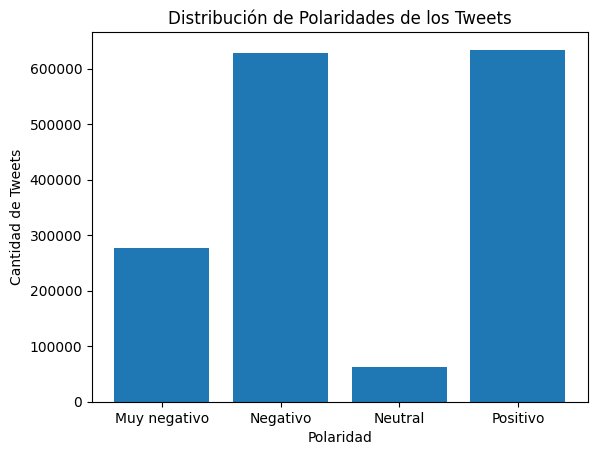

In [ ]:
# Crear una lista con las categorías de polaridad y sus conteos
categories = ['Muy negativo', 'Negativo', 'Neutral', 'Positivo']
counts = [276415, 627361, 62188, 634036]
# Crear el gráfico de barras
plt.bar(categories, counts)

# Agregar etiquetas y título
plt.xlabel('Polaridad')
plt.ylabel('Cantidad de Tweets')
plt.title('Distribución de Polaridades de los Tweets')

# Mostrar el gráfico
plt.show()


la mayor cantidad de tweets se clasifica como "Negativo". Por lo tanto, hay una mayor cantidad de tweets negativos en comparación con los positivos y neutrales.

b.   ¿Cómo se relacionan las distintas polaridades según la complejidad de lectura/escritura de los tweets?

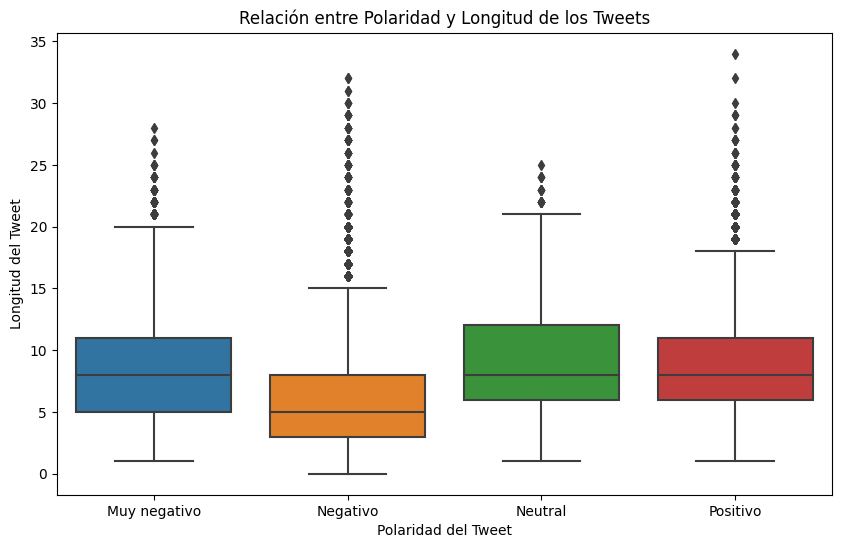

In [ ]:
# Calcular la longitud de los tweets
df_twitter['tweet_length'] = df_twitter['clean_text'].apply(lambda x: len(x.split()))

# Crear el gráfico de boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_category', y='tweet_length', data=df_twitter)

# Agregar etiquetas y título
plt.xlabel('Polaridad del Tweet')
plt.ylabel('Longitud del Tweet')
plt.title('Relación entre Polaridad y Longitud de los Tweets')

# Mostrar el gráfico
plt.show()


2.   ¿Existen patrones gramaticales o sintácticos comunes en los tweets con polaridad positiva o negativa? Por ejemplo, puede que los tweets positivos tiendan a utilizar más palabras de agradecimiento o elogios, mientras que los tweets negativos utilizan más palabras de crítica o enojo.

In [ ]:
# Dividir los tweets en positivos y negativos
tweets_positivos = df_twitter[df_twitter['sentiment_score'] > 0]['clean_text']
tweets_negativos = df_twitter[df_twitter['sentiment_score'] < 0]['clean_text']

# Extracción de características
fdist_positivos = FreqDist([word for tweet in tweets_positivos for word in word_tokenize(tweet)])
fdist_negativos = FreqDist([word for tweet in tweets_negativos for word in word_tokenize(tweet)])

# Mostrar las palabras más frecuentes en cada categoría
# Palabras en tweets positivos
print("Palabras clave en tweets positivos:")
print(fdist_positivos.most_common(10))

# Palabras en tweets más frecuentes en tweets negativos
print("Palabras clave en tweets negativos:")
print(fdist_negativos.most_common(10))


Palabras clave en tweets positivos:
[('good', 83065), ('love', 78416), ('like', 67845), ('go', 60724), ('thank', 54820), ('day', 52065), ('get', 49572), ('lol', 48868), ('want', 43331), ('hope', 40174)]
Palabras clave en tweets negativos:
[('miss', 36669), ('go', 32204), ('get', 26151), ('sad', 24121), ('bad', 21820), ('ill', 21313), ('day', 20928), ('hate', 20086), ('im', 20046), ('work', 19219)]


3.   ¿Qué usuarios tienden a generar tweets con una polaridad más positiva o negativa? ¿Hay alguna relación entre la polaridad de los tweets y el número de tweets?


Usuarios con tweets más positivos:
user_name
lost_dog           549
tweetpet           285
VioletsCRUK        201
KevinEdwardsJr     171
shanajaca          160
DarkPiano          160
SallytheShizzle    150
tsarnick           145
Jayme1988          142
nuttychris         138
Name: count, dtype: int64
Usuarios con tweets más negativos:
user_name
what_bugs_u        245
webwoke            241
wowlew             210
StDAY               77
SallytheShizzle     73
mcraddictal         67
Dogbook             62
BecReedman          59
ilostthegame        52
luckygnahhh         50
Name: count, dtype: int64


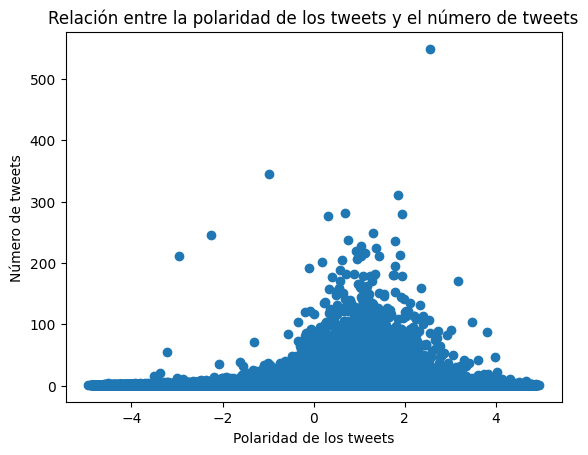

La correlación entre la polaridad de los tweets y el número de tweets es: 0.030417868344225937


In [ ]:
# Usuarios con tweets más positivos
positive_users = df_twitter[df_twitter['sentiment_score'] > 0]['user_name'].value_counts().head(10)
print("Usuarios con tweets más positivos:")
print(positive_users)

# Usuarios con tweets más negativos
negative_users = df_twitter[df_twitter['sentiment_score'] < 0]['user_name'].value_counts().head(10)
print("Usuarios con tweets más negativos:")
print(negative_users)

# Agrupar tweets por usuario y calcular polaridad promedio
users_polarity = df_twitter.groupby('user_name')['sentiment_score'].mean().reset_index()

# Contar el número de menciones por usuario
mentions_count = df_twitter['user_name'].value_counts().reset_index()
mentions_count.columns = ['user_name', 'number_mentions']
# Fusionar los DataFrames de polaridad y conteo de tweets por usuario
users_polarity = pd.merge(users_polarity, mentions_count, on='user_name')

plt.scatter(users_polarity['sentiment_score'], users_polarity['number_mentions'])
plt.xlabel('Polaridad de los tweets')
plt.ylabel('Número de tweets')
plt.title('Relación entre la polaridad de los tweets y el número de tweets')

plt.show()
polarity = users_polarity['sentiment_score']
tweet_count = users_polarity['number_mentions']

correlation = np.corrcoef(polarity, tweet_count)[0, 1]
print("La correlación entre la polaridad de los tweets y el número de tweets es:", correlation)



El número que aparece al costado del user_id en los resultados representa la cantidad de tweets con una polaridad más positiva o negativa generados por ese usuario en particular. En los resultados mostrados, los usuarios se ordenan en función de la cantidad de tweets positivos o negativos que han publicado.

Por ejemplo, en la sección "Usuarios con tweets más positivos", se muestra una lista de los usuarios y la cantidad de tweets positivos que han generado. El número al costado del user_id indica la cantidad de tweets positivos asociados a ese usuario en particular.

Una correlación de 0.0304 indica una correlación extremadamente débil o prácticamente inexistente entre estas dos variables. En términos prácticos, significa que no hay una relación significativa entre la polaridad de los tweets y el número de tweets. En otras palabras, el número de tweets que un usuario publica no está relacionado de manera consistente con la polaridad de esos tweets.

Sin embargo, esto no descarta la posibilidad de que exista alguna otra forma de relación no lineal o dependencia compleja entre la polaridad y el número de tweets, que no se captura mediante la correlación lineal de Pearson.

En resumen, el valor de la correlación cercano a cero indica que no hay una relación significativa entre la polaridad de los tweets y el número de tweets, al menos en términos de una relación lineal simple.

4.   ¿Hay alguna palabra o conjunto de palabras específicas que estén asociadas con tweets de polaridad extrema?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Extracción de características
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(df_twitter['clean_text'])
# Identificación de palabras asociadas a polaridad extrema
extreme_polarity_threshold = 4  # Umbral para considerar tweets de polaridad extrema
extreme_positive_tweets = df_twitter[df_twitter['sentiment_score'] >= extreme_polarity_threshold]['clean_text']
extreme_negative_tweets = df_twitter[df_twitter['sentiment_score'] <= -extreme_polarity_threshold]['clean_text']

positive_word_freq = pd.Series(' '.join(extreme_positive_tweets).split()).value_counts()
negative_word_freq = pd.Series(' '.join(extreme_negative_tweets).split()).value_counts()

print(positive_word_freq)
print(negative_word_freq)


love           25517
good           14202
great          10736
hope            8977
like            8574
               ...  
caterin            1
shyneel            1
ikariam            1
awwright           1
bizcoachdeb        1
Name: count, Length: 70547, dtype: int64
hate         3135
bad          2126
fuck         1701
sad          1513
sick         1366
             ... 
nostalg         1
aaaahhhh        1
neth            1
gavindunc       1
blum            1
Name: count, Length: 16877, dtype: int64


a.    ¿Estas palabras son más comunes en tweets sobre un tema en particular o están distribuidas en todo el dataset?


In [ ]:
from collections import Counter
from nltk import bigrams

#Obtenemos los tweets de polaridad extrema:
extreme_positive_tweets = df_twitter[df_twitter['sentiment_score'] >= extreme_polarity_threshold]['clean_text']
extreme_negative_tweets = df_twitter[df_twitter['sentiment_score'] <= -extreme_polarity_threshold]['clean_text']

#Crear una lista de las palabras más comunes en los tweets de polaridad extrema:
common_positive_words = positive_word_freq.index.tolist()
common_negative_words = negative_word_freq.index.tolist()

#Analizamos los contextos en los que se utilizan estas palabras en los tweets:

#a. Para el caso de palabras positivas:
positive_contexts = []
for tweet in extreme_positive_tweets:
    tweet_context = [word for word in tweet.split() if word in common_positive_words]
    positive_contexts.append(tweet_context)

#b. Para el caso de palabras negativas:
negative_contexts = []
for tweet in extreme_negative_tweets:
    tweet_context = [word for word in tweet.split() if word in common_negative_words]
    negative_contexts.append(tweet_context)

# Análisis de frecuencia de palabras
all_tweets = df_twitter['clean_text']
all_word_counter = Counter()

for tweet in all_tweets:
    words = tweet.split()
    all_word_counter.update(words)

positive_word_counter = Counter()

for tweet_context in positive_contexts:
    positive_word_counter.update(tweet_context)

negative_word_counter = Counter()

for tweet_context in negative_contexts:
    negative_word_counter.update(tweet_context)

# Palabras más comunes en los contextos positivos
print("Palabras más comunes en los contextos positivos:")
print(positive_word_counter.most_common(10))

# Palabras más comunes en los contextos negativos
print("\nPalabras más comunes en los contextos negativos:")
print(negative_word_counter.most_common(10))

# Análisis de co-ocurrencia de palabras
def get_bigrams(words):
    return list(bigrams(words))

positive_bigrams = []

for tweet_context in positive_contexts:
    tweet_bigrams = get_bigrams(tweet_context)
    positive_bigrams.extend(tweet_bigrams)

negative_bigrams = []

for tweet_context in negative_contexts:
    tweet_bigrams = get_bigrams(tweet_context)
    negative_bigrams.extend(tweet_bigrams)

positive_bigram_counter = Counter(positive_bigrams)
negative_bigram_counter = Counter(negative_bigrams)

# Bigramas más comunes en los contextos positivos
print("Bigramas más comunes en los contextos positivos:")
print(positive_bigram_counter.most_common(10))

# Bigramas más comunes en los contextos negativos
print("\nBigramas más comunes en los contextos negativos:")
print(negative_bigram_counter.most_common(10))


Palabras más comunes en los contextos positivos:
[('love', 25517), ('good', 14202), ('great', 10736), ('hope', 8977), ('like', 8574), ('lol', 8260), ('thank', 8181), ('friend', 6834), ('day', 6734), ('haha', 6377)]

Palabras más comunes en los contextos negativos:
[('hate', 3135), ('bad', 2126), ('fuck', 1701), ('sad', 1513), ('sick', 1366), ('kill', 1285), ('hurt', 1142), ('go', 1142), ('hell', 1114), ('get', 1032)]
Bigramas más comunes en los contextos positivos:
[(('good', 'luck'), 2198), (('best', 'friend'), 1741), (('good', 'morn'), 1267), (('great', 'day'), 1158), (('love', 'love'), 955), (('gon', 'na'), 950), (('feel', 'better'), 759), (('sound', 'like'), 735), (('last', 'night'), 723), (('wish', 'could'), 710)]

Bigramas más comunes en los contextos negativos:
[(('gon', 'na'), 279), (('hate', 'hate'), 215), (('fuck', 'fuck'), 214), (('wan', 'na'), 177), (('feel', 'bad'), 172), (('hurt', 'bad'), 153), (('bad', 'bad'), 152), (('sad', 'sad'), 148), (('last', 'night'), 145), (('hat

Los resultados obtenidos muestran las palabras y los bigramas más comunes en los contextos positivos y negativos de los tweets de polaridad extrema.

En el caso de las palabras más comunes en los contextos positivos, se observa que las palabras "love" (amor), "good" (bueno), "great" (genial), "hope" (esperanza), "like" (gustar) son las más frecuentes. Esto indica que en los tweets de polaridad extrema con sentimiento positivo, estas palabras son utilizadas con mayor frecuencia y podrían estar asociadas a temas positivos o expresiones de felicidad, satisfacción y agradecimiento.

Por otro lado, en los contextos negativos, las palabras más comunes son "hate" (odio), "bad" (malo), "fuck" (maldición), "sad" (triste), "sick" (enfermo), entre otras. Estas palabras reflejan sentimientos negativos, descontento o frustración expresados en los tweets de polaridad extrema negativa.

En cuanto a los bigramas más comunes, se observan combinaciones de palabras que suelen estar relacionadas en los contextos positivos y negativos. Por ejemplo, en los contextos positivos se encuentran bigramas como "good luck" (buena suerte), "best friend" (mejor amigo), "great day" (gran día), mientras que en los contextos negativos se encuentran bigramas como "hate hate" (odio odio), "feel bad" (sentirse mal), "sad sad" (triste triste). Estos bigramas muestran las combinaciones de palabras más frecuentes en los tweets de polaridad extrema y proporcionan más contexto sobre los temas y sentimientos expresados en los tweets.

En resumen, estos resultados nos indican las palabras y las combinaciones de palabras más comunes en los tweets de polaridad extrema positiva y negativa, lo cual puede ayudarnos a comprender los temas y los sentimientos asociados a esos tweets en particular.

b.   Escoge un tema y clusteriza los usuarios según polaridades.

In [ ]:
# Vectorizar usando TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(df_twitter['clean_text'])

C:\Users\ANACRISTINA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Método del Codo para la Selección del Número de Clusters')

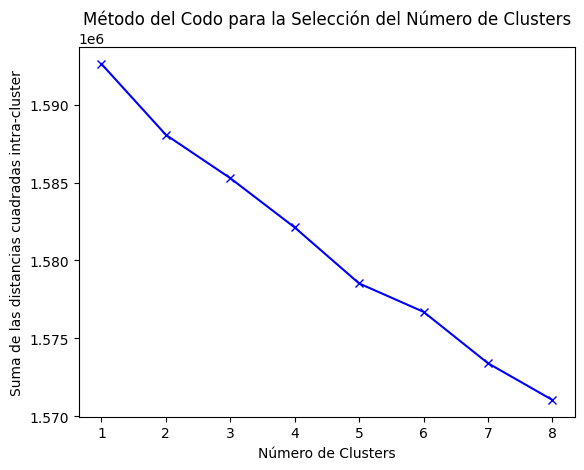

In [ ]:
# Crear una lista vacía para almacenar las sumas de las distancias cuadradas intra-cluster
distancias_cuadradas_intra_cluster = []

# Probar valores de k de 1 a 8
valores_k = range(1, 9)
for k in valores_k:
    # Crear objeto KMeans para un número dado de clusters
    kmeans = KMeans(n_clusters=k)

    # Ajustar el modelo a los datos vectorizados
    kmeans.fit(tfidf)

    # Agregar la suma de las distancias cuadradas intra-cluster a la lista
    distancias_cuadradas_intra_cluster.append(kmeans.inertia_)

# Crear un gráfico de la suma de las distancias cuadradas intra-cluster en función del número de clusters
plt.plot(valores_k, distancias_cuadradas_intra_cluster, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de las distancias cuadradas intra-cluster')
plt.title('Método del Codo para la Selección del Número de Clusters')

5.   ¿Hay alguna correlación entre la polaridad de un tweet y la fecha en que se publicó?


In [ ]:
display(df_twitter)

,tweet_id,date,search,user_name,text,clean_text,sentiment_score,scaled_sentiment_score,readability_score,sentiment_category,tweet_length
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccomyzl awww that bummer ...,-1.9090,-1.9090,68.77,Muy negativo,11
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...,-2.2940,-2.2940,68.77,Muy negativo,11
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...,2.4695,2.4695,103.63,Positivo,10
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire,0.1290,0.1290,99.23,Neutral,6
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav im mad see,-2.4695,-2.4695,49.48,Muy negativo,5
...,...,...,...,...,...,...,...,...,...,...,...
1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,woke school best feel ever,3.1845,3.1845,100.24,Positivo,5
1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom cool hear old walt interview ♫ httpb...,1.5910,1.5910,38.99,Positivo,8
1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,readi mojo makeov ask detail,0.0000,0.0000,66.40,Negativo,5
1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happi th birthday boo alll time tupac amaru sh...,0.0000,0.0000,79.26,Negativo,9


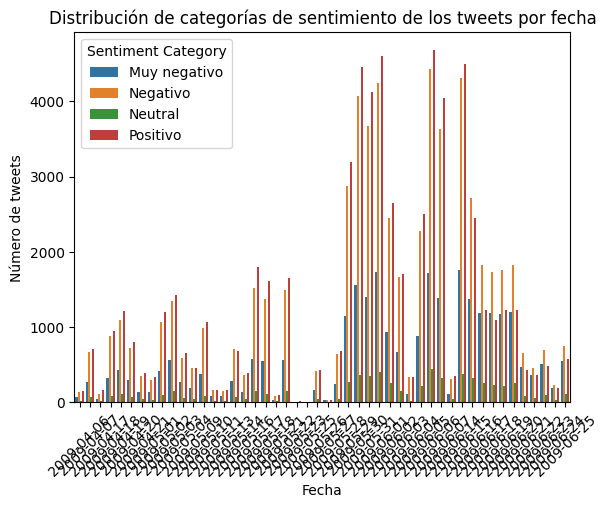

Correlación entre polaridad y fecha: -0.05649216603991913


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Obtener una muestra del 10% de los datos por falta de recursos
df_sample = df_twitter.sample(frac=0.1)

# Convertir la columna "date" a formato de fecha
df_sample['Fecha_tweet'] = pd.to_datetime(df_sample['date'], format='%a %b %d %H:%M:%S PDT %Y').dt.strftime('%Y-%m-%d')
df_sample['Mes'] = pd.to_datetime(df_sample['Fecha_tweet']).dt.month
df_sample['Mes'] = df_sample['Mes'].apply(lambda x: calendar.month_name[x])

# Convertir la columna 'Mes' en una categoría
df_sample['Mes'] = pd.Categorical(df_sample['Mes'], categories=calendar.month_name[1:])

# Calculamos la correlación entre la polaridad y el mes (como categoría) utilizando el coeficiente de Spearman
correlation = df_sample['sentiment_category'].corr(df_sample['Mes'].astype('category').cat.codes, method='spearman')

# Agrupamos los tweets por 'Fecha_tweet' y 'sentiment_category' y contar el número de tweets en cada combinación
df_grouped = df_sample.groupby(['Fecha_tweet', 'sentiment_category']).size().reset_index(name='Count')

# Ordenamos las categorías de sentiment_category en un orden específico
category_order = ['Muy negativo', 'Negativo', 'Neutral', 'Positivo']
df_grouped = df_grouped[df_grouped['sentiment_category'].isin(category_order)]

# Crear un gráfico de barras agrupadas
sns.barplot(data=df_grouped, x='Fecha_tweet', y='Count', hue='sentiment_category')
plt.xlabel('Fecha')
plt.ylabel('Número de tweets')
plt.title('Distribución de categorías de sentimiento de los tweets por fecha')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Category')
plt.show()

# Imprimir el valor de correlación
print("Correlación entre polaridad y fecha:", correlation)


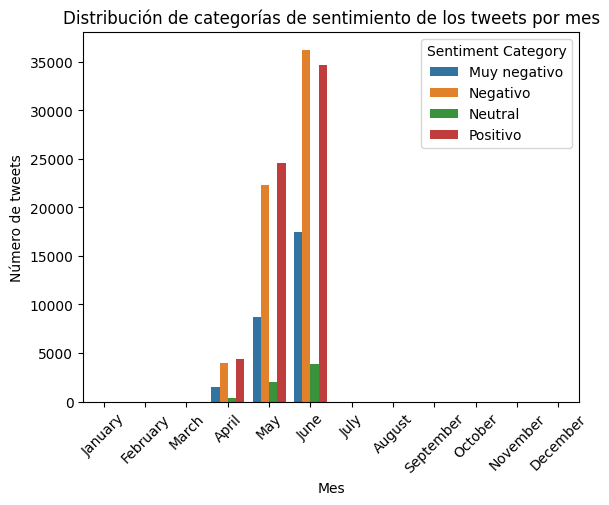

Correlación entre polaridad y mes: -0.05649216603991913


In [ ]:
# Agrupamos los tweets por 'Mes' y 'sentiment_category' y contamos el número de tweets en cada combinación
df_grouped_month = df_sample.groupby(['Mes', 'sentiment_category']).size().reset_index(name='Count')

# Ordenamos las categorías de sentiment_category en un orden específico
df_grouped_month = df_grouped_month[df_grouped_month['sentiment_category'].isin(category_order)]

# Crear un gráfico de barras agrupadas por mes
sns.barplot(data=df_grouped_month, x='Mes', y='Count', hue='sentiment_category')
plt.xlabel('Mes')
plt.ylabel('Número de tweets')
plt.title('Distribución de categorías de sentimiento de los tweets por mes')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Category')
plt.show()

# Imprimir el valor de correlación
print("Correlación entre polaridad y mes:", correlation)


a.    ¿Los tweets publicados durante ciertos períodos de tiempo tienden a ser más positivos o negativos que otros?


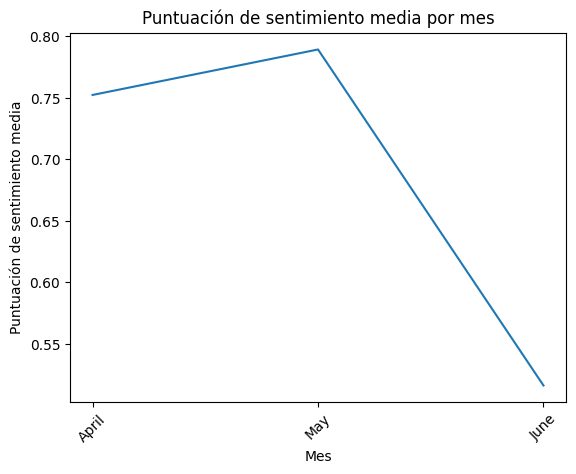

In [ ]:
# Convertir la columna "date" a formato de fecha
df_twitter['Fecha_tweet'] = pd.to_datetime(df_twitter['date'], format='%a %b %d %H:%M:%S PDT %Y').dt.strftime('%Y-%m-%d')
df_twitter['Mes'] = pd.to_datetime(df_twitter['Fecha_tweet']).dt.month
df_twitter['Mes'] = df_twitter['Mes'].apply(lambda x: calendar.month_name[x])

# Calcular la media de la puntuación de sentimiento por mes
df_sentiment_by_month = df_twitter.groupby('Mes')['sentiment_score'].mean().reset_index()

# Ordenar los meses en orden cronológico
df_sentiment_by_month['Mes'] = pd.Categorical(df_sentiment_by_month['Mes'], categories=calendar.month_name[1:], ordered=True)
df_sentiment_by_month = df_sentiment_by_month.sort_values('Mes')

# Crear un gráfico de línea para visualizar las medias de sentimiento por mes
sns.lineplot(data=df_sentiment_by_month, x='Mes', y='sentiment_score')
plt.xlabel('Mes')
plt.ylabel('Puntuación de sentimiento media')
plt.title('Puntuación de sentimiento media por mes')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import numpy as np

# Calcular la pendiente de la línea de tendencia
x = np.arange(len(df_sentiment_by_month))
y = df_sentiment_by_month['sentiment_score']
slope, _, _, _, _ = np.polyfit(x, y, 1, full=True)

# Imprimir la pendiente
print("Pendiente de la línea de tendencia:", slope[0])

Pendiente de la línea de tendencia: -0.11809715321499838


 El valor de la pendiente de la línea de tendencia (-0.1181) indica una tendencia negativa en la puntuación de sentimiento media a lo largo del tiempo. Esto significa que, en promedio, los tweets publicados en meses más recientes tienden a tener una puntuación de sentimiento más baja en comparación con los meses anteriores.

Dado que la pendiente es negativa, podemos interpretar que ha habido una disminución gradual en la positividad percibida de los tweets a medida que pasa el tiempo

6.   Identifica los Top 10 Trolls y Top 10 Influencers. Justifica las características de un usuario Troll e Influencer.


In [ ]:
# Crear un nuevo DataFrame para contar los tweets de cada usuario por categoría de sentimiento
df_trolls_influencer = df_twitter.groupby(['user_name', 'sentiment_category']).size().reset_index(name='Count')

# Filtrar los usuarios con categoría "Muy negativo" y seleccionar los 10 primeros como trolls
top_10_trolls = df_trolls_influencer[(df_trolls_influencer['sentiment_category'] == 'Muy negativo')].nlargest(10, 'Count')

# Filtrar los usuarios con categoría "Positivo" y seleccionar los 10 primeros como influencers
top_10_influencers = df_trolls_influencer[df_trolls_influencer['sentiment_category'] == 'Positivo'].nlargest(10, 'Count')

# Imprimir los Top 10 Trolls
print("Top 10 Trolls:")
print(top_10_trolls[['user_name', 'Count']])

# Imprimir los Top 10 Influencers
print("Top 10 Influencers:")
print(top_10_influencers[['user_name', 'Count']])

Top 10 Trolls:
               user_name  Count
2570216      what_bugs_u    245
2566096          webwoke    241
2584932           wowlew    210
839116             StDAY     66
780840   SallytheShizzle     60
1970052      mcraddictal     54
1600460     ilostthegame     50
97972         BecReedman     46
242116           Dogbook     44
2048992  mrs_mcsupergirl     42
Top 10 Influencers:
               user_name  Count
1897363         lost_dog    549
2521787         tweetpet    285
932439       VioletsCRUK    188
472035    KevinEdwardsJr    171
219675         DarkPiano    158
2326491        shanajaca    149
2517123         tsarnick    141
2119579       nuttychris    134
780843   SallytheShizzle    133
1460927   felicityfuller    132


7.   Extra: Utiliza Transformers con el pipeline de Huggingface para calcular la polaridad de los tweets y comparar los resultados de la pregunta 1

In [ ]:
# Establecer la semilla aleatoria
np.random.seed(42)

# Seleccionamos una muestra aleatoria de 100,000 filas del dataframe original
df_twitter_data_subset = df_twitter.sample(n=100000, random_state=42)

from transformers import pipeline

# Creamos una instancia del pipeline de clasificación de sentimiento
sentiment_evaluador = pipeline('sentiment-analysis')



No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
#Definimos la función para analizar el sentimiento de un texto
def analyze_sentiment(text):

    # Utilizamos el pipeline para realizar la clasificación de sentimiento
    result = sentiment_evaluador(text)

    label = result[0]['label']
    score = result[0]['score']

    # Mapear la etiqueta y el puntaje a una escala de -5 a 5
    if label == 'NEGATIVE':
        polarity = round(score * 10,2)
        if 0 <= polarity <= 2.00:
            polarity = -1
        elif 2.01 <= polarity <= 4.00:
            polarity = -2
        elif 4.01 <= polarity <= 6.00:
            polarity = -3
        elif 6.01 <= polarity <= 8.00:
            polarity = -4
        elif 8.01 <= polarity <= 10.00:
            polarity = -5
    elif label == 'NEUTRAL':
        polarity = 0
    elif label == 'POSITIVE':
        polarity = round(score * 10,2)
        if 0 <= polarity <= 2.00:
            polarity = 1
        elif 2.01 <= polarity <= 4.00:
            polarity = 2
        elif 4.01 <= polarity <= 6.00:
            polarity = 3
        elif 6.01 <= polarity <= 8.00:
            polarity = 4
        elif 8.01 <= polarity <= 10.00:
            polarity = 5

    return polarity


In [ ]:
#Aplicamos la función analyze_sentiment a la columna 'clean_text' del dataframe

df_twitter_data_subset['sentiment_score_transformers'] = df_twitter_data_subset['clean_text'].apply(analyze_sentiment)


In [ ]:
#Asignamos clasificación de polaridad (Negativo, Neutro, Positivo) en función de la puntuación obtenida
df_twitter_data_subset['Clasification_transformers'] = df_twitter_data_subset['sentiment_score_transformers'].apply(lambda x: 'Negativo' if x < 0 else 'Neutro' if x == 0 else 'Positivo')

In [ ]:
# Realizamos una unión interna entre el dataframe original y el dataframe resultante
twitter_data_merged = df_twitter.merge(df_twitter_data_subset[['user_name', 'sentiment_score_transformers','Clasification_transformers']], on='user_name', how='inner')

In [ ]:
# Contamos las coincidencias exactas entre las puntuaciones sentimentales y clasificaciones obtenidas en ambos métodos
total_tweets = twitter_data_merged.shape[0]
correct_predictions_count = (twitter_data_merged['sentiment_score'] == twitter_data_merged['sentiment_score_transformers']).sum()
classification_correct_predictions_count = (twitter_data_merged['Clasification_transformers'] == twitter_data_merged['sentiment_category']).sum()

# Calcular el porcentaje de precisión a nivel de puntuación y clasificación
accuracy = correct_predictions__count / total_tweets * 100
accuracy_ = classification_correct_predictions_count / total_tweets * 100

print(f"Porcentaje de precisión a nivel de puntuación: {round(accuracy,2)}%")
print(f"Porcentaje de precisión en clasificación: {round(accuracy_,2)}%")

Porcentaje de precisión a nivel de puntuación: 0.0%
Porcentaje de precisión en clasificación: 39.63%


el porcentaje de precisión a nivel de puntuación es del 0.0%, lo que significa que no hubo coincidencias exactas entre las puntuaciones sentimentales calculadas por ambos métodos. Esto indica que las puntuaciones sentimentales obtenidas no son idénticas y difieren en algún grado.

El porcentaje de precisión en clasificación es del 39.63%. Esto significa que aproximadamente el 39.63% de los tweets fueron clasificados correctamente en términos de su polaridad (negativo, neutral o positivo) utilizando el método de Transformers. Sin embargo, es importante tener en cuenta que la precisión en la clasificación es relativamente baja, lo que indica que hay una discrepancia significativa entre las clasificaciones realizadas por ambos métodos.

*VISUALIZACIÓN:*

1.   ¿Cómo se distribuyen los tweets según su polaridad a lo largo del tiempo?


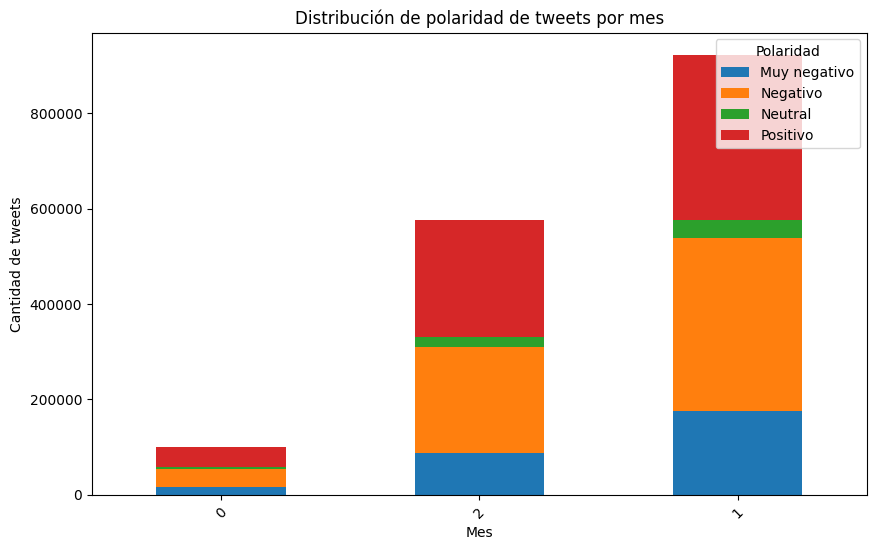

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Calculamos la distribución de los tweets por categoría de polaridad y mes
df_polarity_distribution = df_twitter.groupby(['Mes', 'sentiment_category']).size().unstack()

# Restablecemos el índice del DataFrame
df_polarity_distribution = df_polarity_distribution.reset_index()

# Ordenamos los meses en orden cronológico
df_polarity_distribution['Mes'] = pd.Categorical(df_polarity_distribution['Mes'], categories=calendar.month_name[1:], ordered=True)
df_polarity_distribution = df_polarity_distribution.sort_values('Mes')

# Creamos un gráfico de barras apiladas
ax = df_polarity_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configuramos el título y las etiquetas de los ejes
plt.title('Distribución de polaridad de tweets por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de tweets')

# Mostramos leyenda
plt.legend(title='Polaridad', loc='upper right')

# Rotamos las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.show()


2.   Visualiza el análisis sintáctico (número de palabras, frase, verbos, nombres…) de los top 10 Trolls e
Influencers.


In [ ]:
!python -m spacy download es_core_news_sm


In [ ]:
import matplotlib.pyplot as plt

def visualize_syntax_analysis(analysis_results, category):
    num_words = [analysis['num_words'] for analysis in analysis_results]
    num_sentences = [analysis['num_sentences'] for analysis in analysis_results]
    num_verbs = [len(analysis['verbs']) for analysis in analysis_results]
    num_nouns = [len(analysis['nouns']) for analysis in analysis_results]

    # Limitar la cantidad de barras mostradas a 5
    limit = 5
    num_words = num_words[:limit]
    num_sentences = num_sentences[:limit]
    num_verbs = num_verbs[:limit]
    num_nouns = num_nouns[:limit]

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f"Análisis sintáctico de los top 10 {category}")

    # Visualizar el número de palabras
    axes[0, 0].bar(range(len(num_words)), num_words)
    axes[0, 0].set_xticks(range(len(num_words)))
    axes[0, 0].set_xticklabels([f"{i+1}" for i in range(len(num_words))])
    axes[0, 0].set_xlabel("Troll/Influencer")
    axes[0, 0].set_ylabel("Número de palabras")
    axes[0, 0].set_title("Número de palabras")

    # Visualizar el número de frases
    axes[0, 1].bar(range(len(num_sentences)), num_sentences)
    axes[0, 1].set_xticks(range(len(num_sentences)))
    axes[0, 1].set_xticklabels([f"{i+1}" for i in range(len(num_sentences))])
    axes[0, 1].set_xlabel("Troll/Influencer")
    axes[0, 1].set_ylabel("Número de frases")
    axes[0, 1].set_title("Número de frases")

    # Visualizar el número de verbos
    axes[1, 0].bar(range(len(num_verbs)), num_verbs)
    axes[1, 0].set_xticks(range(len(num_verbs)))
    axes[1, 0].set_xticklabels([f"{i+1}" for i in range(len(num_verbs))])
    axes[1, 0].set_xlabel("Troll/Influencer")
    axes[1, 0].set_ylabel("Número de verbos")
    axes[1, 0].set_title("Número de verbos")

    # Visualizar el número de nombres
    axes[1, 1].bar(range(len(num_nouns)), num_nouns)
    axes[1, 1].set_xticks(range(len(num_nouns)))
    axes[1, 1].set_xticklabels([f"{i+1}" for i in range(len(num_nouns))])
    axes[1, 1].set_xlabel("Troll/Influencer")
    axes[1, 1].set_ylabel("Número de nombres")
    axes[1, 1].set_title("Número de nombres")

    plt.tight_layout()
    plt.show()



In [ ]:
# Obtener los nombres de usuario de los top 10 Trolls e Influencers
troll_usernames = top_10_trolls['user_name'].tolist()
influencer_usernames = top_10_influencers['user_name'].tolist()

# Filtrar los tweets de los top 10 Trolls e Influencers
troll_tweets = df_twitter[df_twitter['user_name'].isin(troll_usernames)]
influencer_tweets = df_twitter[df_twitter['user_name'].isin(influencer_usernames)]


In [ ]:
import spacy

nlp = spacy.load('es_core_news_sm')

def perform_syntax_analysis(tweets):
    analysis_results = []

    for tweet in tweets['text']:
        doc = nlp(tweet)

        # Contar el número de palabras en el tweet
        num_words = len(doc)

        # Contar el número de frases en el tweet
        num_sentences = len(list(doc.sents))

        # Obtener la lista de verbos en el tweet
        verbs = [token.text for token in doc if token.pos_ == 'VERB']

        # Obtener la lista de nombres en el tweet
        nouns = [token.text for token in doc if token.pos_ == 'NOUN']

        # Guardar los resultados del análisis
        analysis_results.append({
            'num_words': num_words,
            'num_sentences': num_sentences,
            'verbs': verbs,
            'nouns': nouns
        })

    return analysis_results

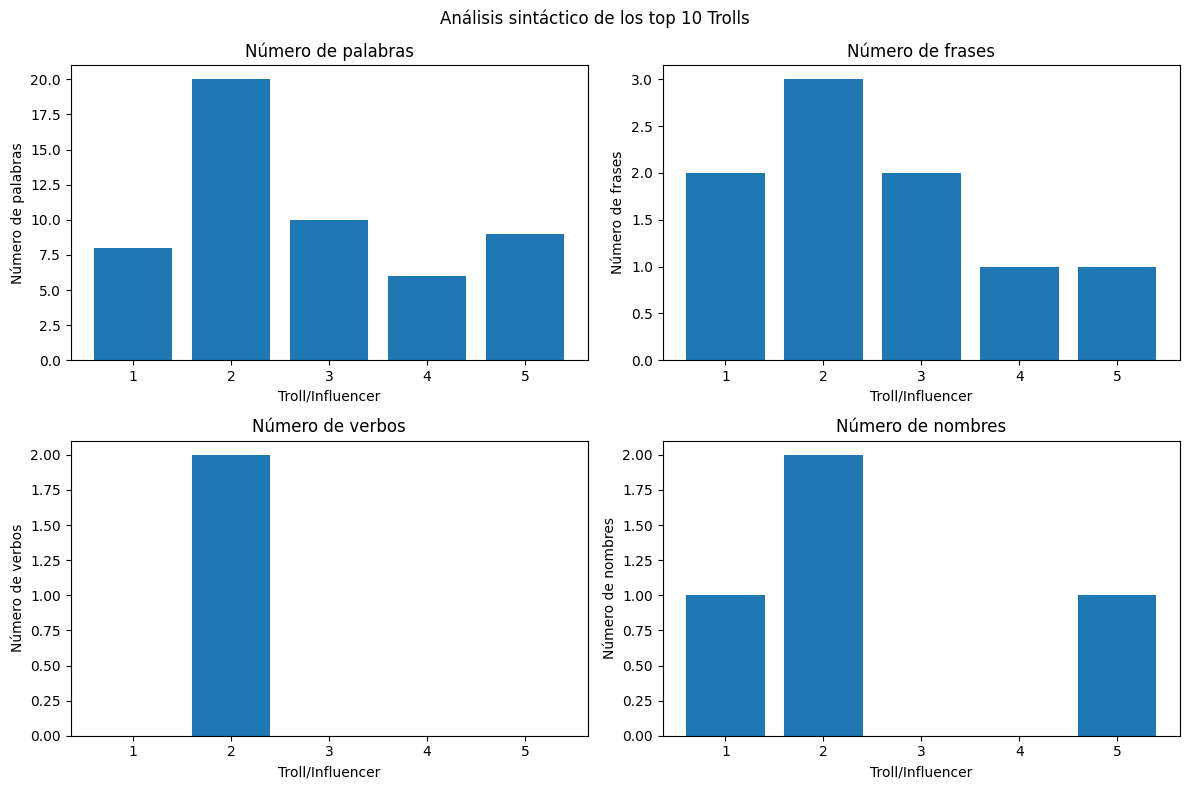

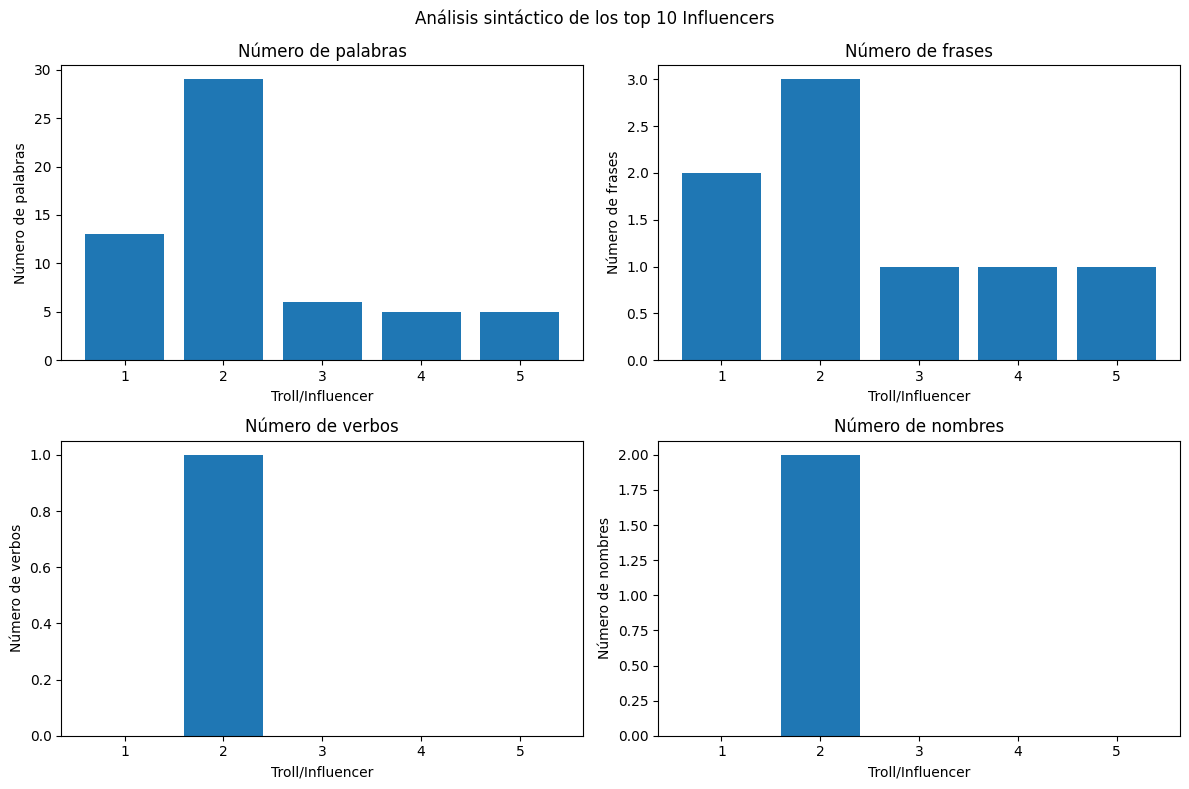

In [ ]:
# Realizar el análisis sintáctico para los top 10 Trolls e Influencers
troll_analysis_results = perform_syntax_analysis(troll_tweets)
influencer_analysis_results = perform_syntax_analysis(influencer_tweets)

# Visualizar el análisis sintáctico de los top 10 Trolls
visualize_syntax_analysis(troll_analysis_results, "Trolls")

# Visualizar el análisis sintáctico de los top 10 Influencers
visualize_syntax_analysis(influencer_analysis_results, "Influencers")

Los gráficos que se generan representan el análisis sintáctico de los top 10 trolls e influencers en el conjunto de datos de Twitter. Hay un total de 8 gráficos, divididos en 4 para los trolls y 4 para los influencers.

Para cada grupo (trolls e influencers), se muestran 4 aspectos diferentes del análisis sintáctico:

Número de palabras: Este gráfico muestra el número de palabras presentes en los tweets de cada troll o influencer. Cada barra representa la cantidad de palabras en un troll o influencer específico.

Número de frases: Este gráfico muestra el número de frases presentes en los tweets de cada troll o influencer. Cada barra representa la cantidad de frases en un troll o influencer específico.

Número de verbos: Este gráfico muestra el número de verbos utilizados en los tweets de cada troll o influencer. Cada barra representa la cantidad de verbos en un troll o influencer específico.

Número de nombres: Este gráfico muestra el número de nombres utilizados en los tweets de cada troll o influencer. Cada barra representa la cantidad de nombres en un troll o influencer específico.

3.   ¿Existe alguna correlación entre el número de menciones de un usuario y la polaridad de sus tweets?
Representa visualmente esta relación.


In [ ]:
# Contar el número de menciones por usuario
mentions_count = df_twitter['user_name'].value_counts().reset_index()
mentions_count.columns = ['user_name', 'number_mentions']
# Fusionar los DataFrames de polaridad y conteo de tweets por usuario
users_polarity = pd.merge(users_polarity, mentions_count, on='user_name')
display(users_polarity)

,user_name,sentiment_score,number_mentions_x,number_mentions_y
0,000catnap000,0.73500,6,6
1,000matthewkelly,3.75300,1,1
2,000yea000,2.78700,1,1
3,0010x0010,2.10750,1,1
4,001BabyGirl,1.23475,2,2
...,...,...,...,...
659770,zzztar,0.00000,2,2
659771,zzzum,0.00000,1,1
659772,zzzunzinnn,0.87200,3,3
659773,zzzyourdreamzzz,-1.25000,1,1


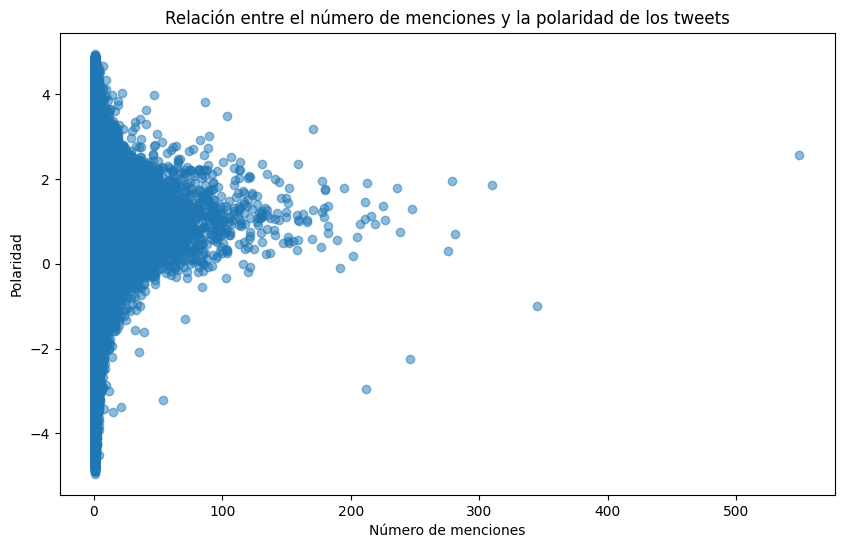

Coeficiente de correlación: 0.030417868344225933


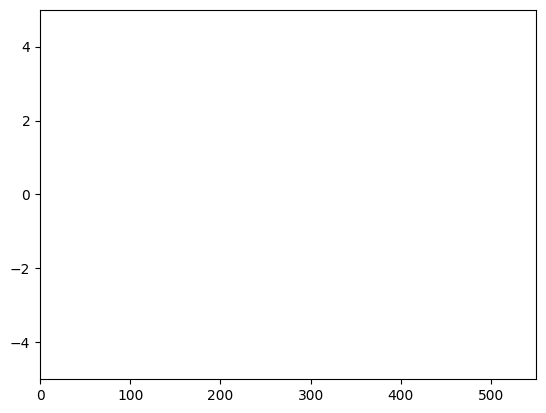

In [ ]:
import matplotlib.pyplot as plt

# Visualizar la relación entre el número de menciones y la polaridad
plt.figure(figsize=(10, 6))
plt.scatter(users_polarity['number_mentions_y'], users_polarity['sentiment_score'], alpha=0.5)
plt.xlabel('Número de menciones')
plt.ylabel('Polaridad')
plt.title('Relación entre el número de menciones y la polaridad de los tweets')
plt.show()

plt.xlim(0, max(users_polarity['number_mentions_x'])+1)
plt.ylim(-5, 5)

# Calcular la correlación entre el número de menciones y la polaridad
correlation = np.corrcoef(users_polarity['number_mentions_y'], users_polarity['sentiment_score'])[0, 1]
print("Coeficiente de correlación:", correlation)


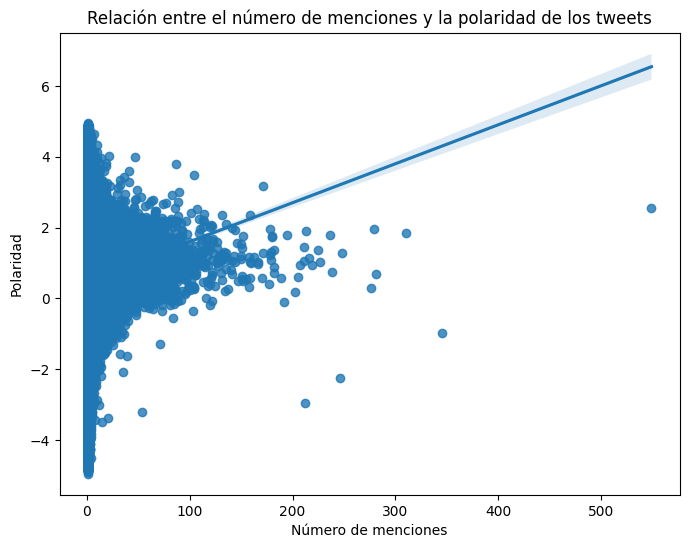

In [ ]:
# Crear un gráfico de correlación utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.regplot(x='number_mentions_y', y='sentiment_score', data=users_polarity)
plt.xlabel('Número de menciones')
plt.ylabel('Polaridad')
plt.title('Relación entre el número de menciones y la polaridad de los tweets')
plt.show()

4.   Crea una nube de palabras para cada polaridad.


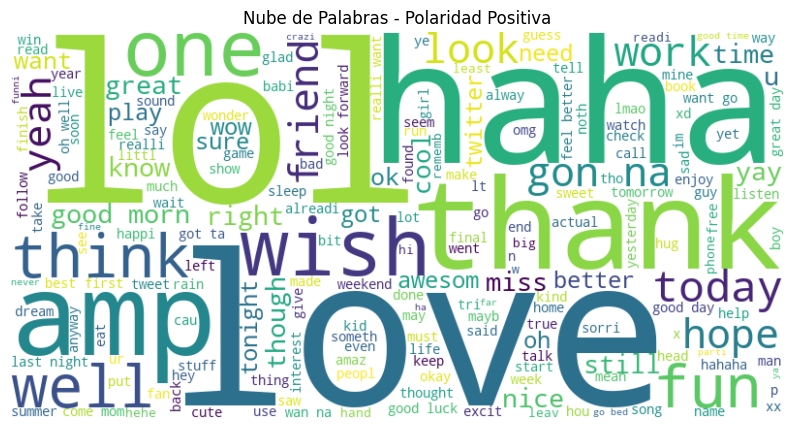

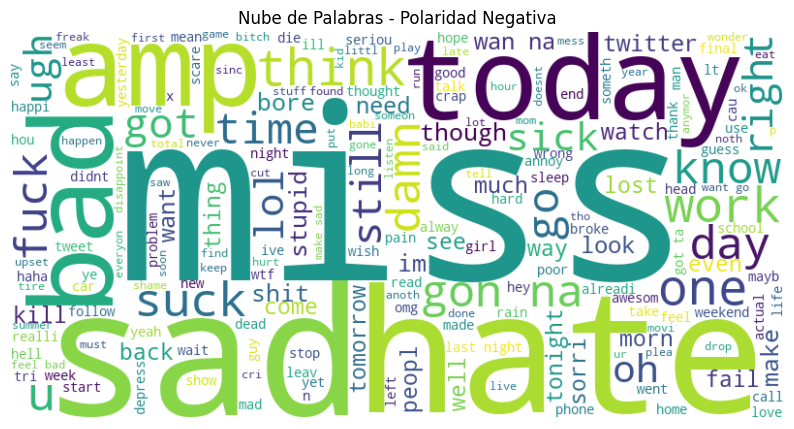

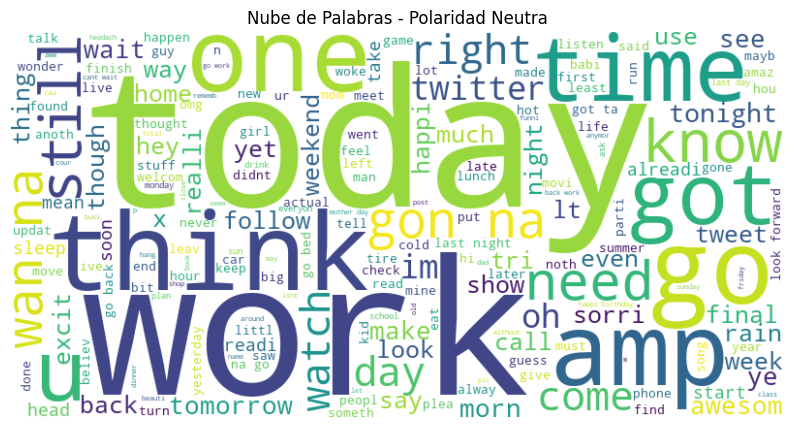

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear una función para generar la nube de palabras
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Filtrar los tweets por polaridad positiva
positive_tweets = df_twitter[df_twitter['sentiment_score'] > 0]['clean_text']

# Concatenar los tweets en un solo texto
positive_text = ' '.join(positive_tweets)

# Generar la nube de palabras para la polaridad positiva
generate_wordcloud(positive_text, "Nube de Palabras - Polaridad Positiva")

# Filtrar los tweets por polaridad negativa
negative_tweets = df_twitter[df_twitter['sentiment_score'] < 0]['clean_text']

# Concatenar los tweets en un solo texto
negative_text = ' '.join(negative_tweets)

# Generar la nube de palabras para la polaridad negativa
generate_wordcloud(negative_text, "Nube de Palabras - Polaridad Negativa")

# Filtrar los tweets por polaridad neutra
neutral_tweets = df_twitter[df_twitter['sentiment_score'] == 0]['clean_text']

# Concatenar los tweets en un solo texto
neutral_text = ' '.join(neutral_tweets)

# Generar la nube de palabras para la polaridad neutra
generate_wordcloud(neutral_text, "Nube de Palabras - Polaridad Neutra")


5.   ¿Cómo se distribuyen los tweets según su polaridad en función de la hora del día o el día de la semana?

C:\Users\ANACRISTINA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


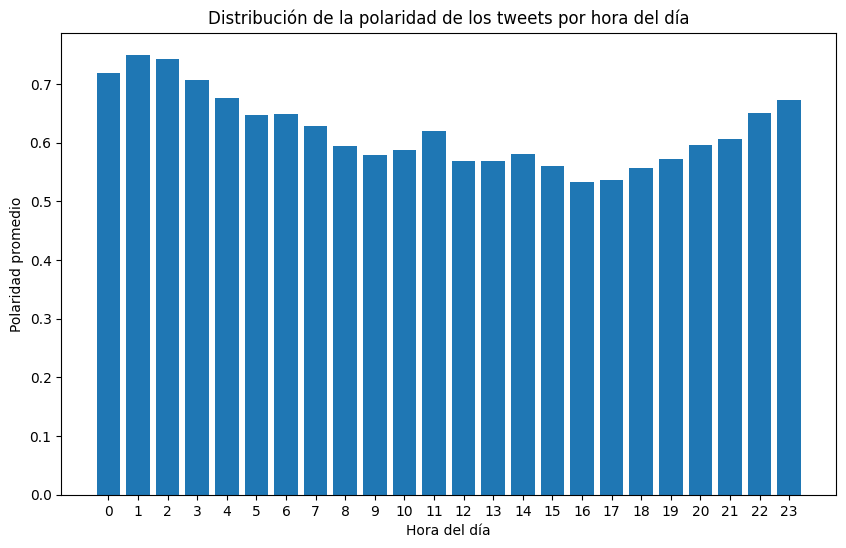

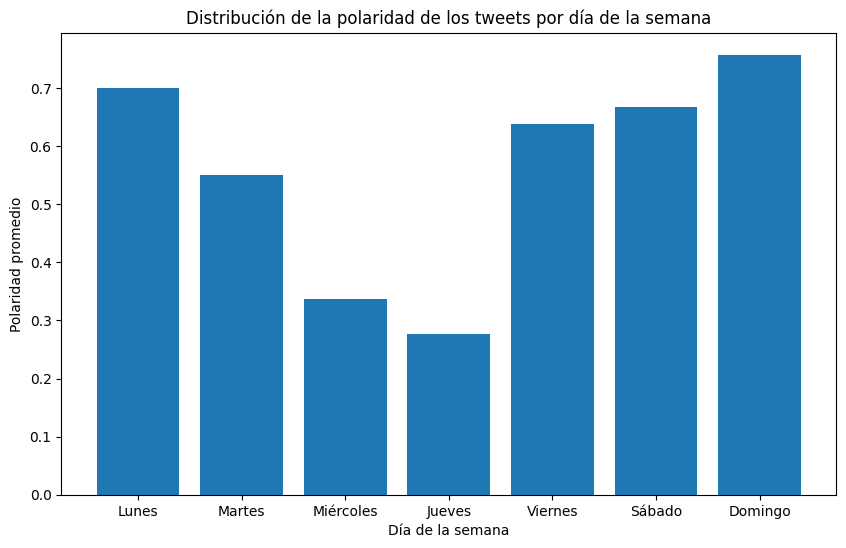

In [ ]:
import matplotlib.pyplot as plt

# Convertir la columna 'date' a formato de fecha y hora
df_twitter['date'] = pd.to_datetime(df_twitter['date'])

# Agrupar los tweets por hora del día
tweets_by_hour = df_twitter.groupby(df_twitter['date'].dt.hour)['sentiment_score'].mean()

# Crear un gráfico de barras para la distribución de la polaridad por hora del día
plt.figure(figsize=(10, 6))
plt.bar(tweets_by_hour.index, tweets_by_hour.values)
plt.xlabel('Hora del día')
plt.ylabel('Polaridad promedio')
plt.title('Distribución de la polaridad de los tweets por hora del día')
plt.xticks(range(24))
plt.show()

# Agrupar los tweets por día de la semana
tweets_by_day = df_twitter.groupby(df_twitter['date'].dt.dayofweek)['sentiment_score'].mean()
day_labels = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Crear un gráfico de barras para la distribución de la polaridad por día de la semana
plt.figure(figsize=(10, 6))
plt.bar(tweets_by_day.index, tweets_by_day.values)
plt.xlabel('Día de la semana')
plt.ylabel('Polaridad promedio')
plt.title('Distribución de la polaridad de los tweets por día de la semana')
plt.xticks(range(7), day_labels)
plt.show()
